In [6]:
import pandas as pd

def compute_mean_audio_features(tracks_df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute the mean audio features for tracks of the same artist.

    :param tracks_df: tracks dataframe (with audio features per each track).
    :return: artist dataframe (with mean audio features per each artist).
    """
    # Group tracks by artist and compute the mean of audio features for each artist
    artist_df = tracks_df.groupby('Artist_id').mean()

    # Merge the artist name into the resulting dataframe
    artist_df = artist_df.merge(tracks_df[['Artist_id', 'Artist']], on='Artist_id').drop_duplicates()

    return artist_df

In [10]:
import networkx as nx
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances


In [15]:
def create_similarity_graph(artist_audio_features_df: pd.DataFrame, similarity: str, out_filename: str = None) -> nx.Graph:
    """
    Create a similarity graph from a dataframe with mean audio features per artist.

    :param artist_audio_features_df: dataframe with mean audio features per artist.
    :param similarity: the name of the similarity metric to use (e.g. "cosine" or "euclidean").
    :param out_filename: name of the file that will be saved.
    :return: a networkx graph with the similarity between artists as edge weights.

    """
    graph = nx.Graph()

    # Compute similarity matrix
    if similarity == 'cosine':
        similarity_matrix = cosine_distances(artist_audio_features_df.drop(['Artist', 'Artist_id'], axis=1)) #We need to drop the two colums that are not numbers!!

    elif similarity == 'euclidean':
        similarity_matrix = euclidean_distances(artist_audio_features_df.drop(['Artist', 'Artist_id'], axis=1))

    else:
        raise ValueError("Invalid similarity metric. Supported metrics: 'cosine', 'euclidean'.")


    for index, row in artist_audio_features_df.iterrows():
        graph.add_node(index, artist_name=row["Artist"])

    num_artists = len(artist_audio_features_df)

    for i in range(num_artists):
        for j in range(i+1, num_artists):
            graph.add_edge(i, j, weight=similarity_matrix[i, j])

    if out_filename is not None:
        nx.write_graphml(graph, out_filename)

    return graph

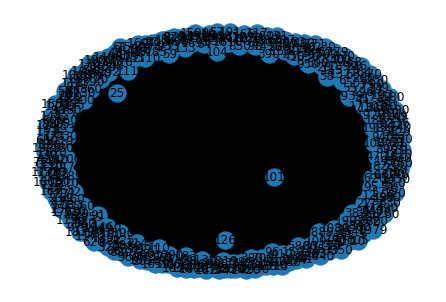

In [18]:
import matplotlib.pyplot as plt

graph = create_similarity_graph(artist_audio_features_df= result_df, similarity= "cosine", out_filename= None) 
nx.draw(graph, with_labels=True)
plt.show()

In [9]:
# Read the CSV file into a DataFrame
tracks_df = pd.read_csv('top_artists_tracks.csv')

# Call the compute_mean_audio_features function
result_df = compute_mean_audio_features(tracks_df)

# Print the resulting DataFrame
print(result_df)

result_df.to_csv('mean_audio_features.csv', index=False)


                   Artist_id  Duration  Popularity  Danceablility  Energy  \
0     01QTIT5P1pFP3QnnFSdsJf  233679.4        60.4         0.6256  0.7863   
10    07d5etnpjriczFBB8pxmRe  238746.7        49.2         0.6072  0.6375   
20    08Ld63UgKrJ0nZnCkzHtzc  208204.4        56.9         0.8357  0.7311   
30    0A0FS04o6zMoto8OKPsDwY  224088.2        64.0         0.7640  0.5586   
40    0CKa42Jqrc9fSFbDjePaXP  217248.1        43.4         0.7416  0.6801   
...                      ...       ...         ...            ...     ...   
1949  7meyrw7Or5DwteYxDJrkCM  190698.4        47.7         0.7471  0.6246   
1959  7pFeBzX627ff0VnN6bxPR4  215043.1        58.7         0.7006  0.6405   
1969  7rkW85dBwwrJtlHRDkJDAC  198969.2        67.7         0.7751  0.6214   
1979  7wlFDEWiM5OoIAt8RSli8b  164790.6        71.0         0.7406  0.6451   
1989  7yO4IdJjCEPz7YgZMe25iS  220425.5        57.7         0.8077  0.6739   

      Loudness  Speechiness  Acoustincness  Instrumentalness  Liveness  \
0